# Ejercicio 1

Un analista hace un estudio químico y espera que el rendimiento de cierta sustancia se vea afectado por dos factores. Se realizan 17 experimentos cuyos datos se registran en el cuadro siguiente. Por experimentos similares, se sabe que los factores $x_1$ y $x_2$ no están relacionados; por ello, el analista decide utilizar un modelo de regresión lineal múltiple. Calcule el modelo de regresión y grafíquelo sobre las observaciones.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [42]:
data = pd.read_csv('est_quimico.csv')
data

,Experimento,x1,x2,y
0,1,41.9,29.1,251.3
1,2,43.4,29.3,251.3
2,3,43.9,29.5,248.3
3,4,44.5,29.7,267.5
4,5,47.3,29.9,273.0
5,6,47.5,30.3,276.5
6,7,47.9,30.5,270.3
7,8,50.2,30.7,274.9
8,9,52.8,30.8,285.0
9,10,53.2,30.9,290.0


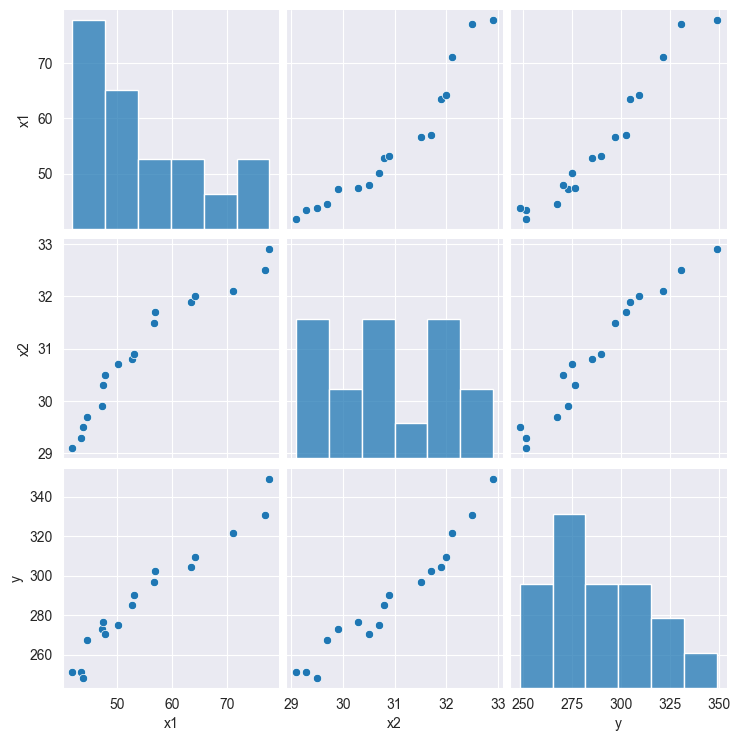

In [43]:
sns.pairplot(data.drop('Experimento', axis=1))

In [44]:
n = data.shape[0]

x = np.concatenate([np.ones((n, 1)), data[['x1', 'x2']]], axis=1)

In [45]:
y = data[['y']].to_numpy()

## Modelo de Regresión Lineal Manual

In [46]:
beta = np.linalg.inv(x.T @ x) @ x.T @ y
beta

array([[-151.75799982],
       [   1.25389314],
       [  12.00081181]])

## Modelo de Regresión Lineal

In [47]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

### SSE

In [48]:
SSE = y.T @ y - beta.T @ x.T @ y
SSE

array([[413.0143272]])

### Estimación de Varianza

In [51]:
varest = SSE / (n - beta.shape[0])
varest

array([[29.50102337]])

### $R^2$

In [52]:
model.score(x, y)

0.9688049045268312

## Gráfica

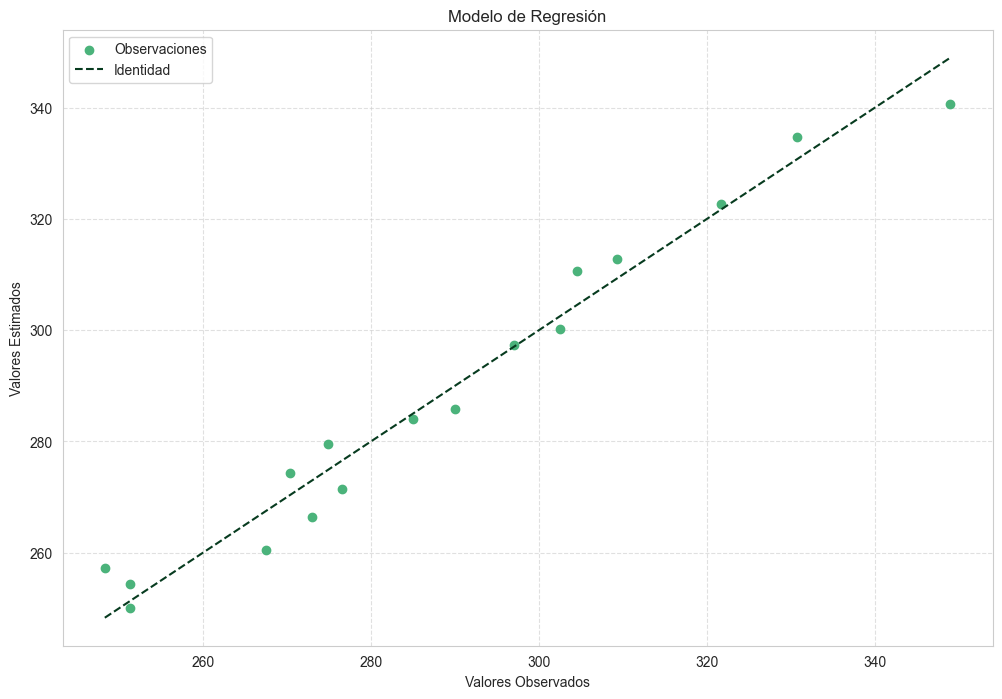

In [57]:
plt.figure(figsize=(12, 8))
plt.scatter(x=y, y=y_pred, c='#4bb37b', label='Observaciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="#073b1f", linestyle="--", label="Identidad")
plt.xlabel("Valores Observados")
plt.ylabel("Valores Estimados")
plt.title("Modelo de Regresión")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()